# COVID 19 Analysis


See original [COVID-Analysis.ipynb](COVID-Analysis.ipynb) as ref impl

Also see [COVID-USAfacts.ipynb](COVID-USAfacts.ipynb) - using finer grain state/county aggregated data from https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/  

Datasets in this notebook courtesy of John Hopkins, just download via:

-  git clone https://github.com/CSSEGISandData/COVID-19.git


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drdir = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
tsdir = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

daily_f = drdir+'03-23-2020.csv' # 03-18-2020.csv etc
confirmed_f = tsdir+'time_series_covid19_confirmed_global.csv'
deaths_f = tsdir+'time_series_covid19_deaths_global.csv'
#recovs_f = tsdir+'time_series_19-covid-Recovered.csv'

dfc = pd.read_csv(confirmed_f)
dfd = pd.read_csv(deaths_f)
#dfr = pd.read_csv(recovs_f)

confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)

display(dfc.head())
# display(dfr.head())
display(dfd.head())


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)

confirmed.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-03-20,24,70,90,75,1,1,128,136,791,2388,...,0,29,140,4014,94,33,42,91,2,1
2020-03-21,24,76,139,88,2,1,158,160,1071,2814,...,1,47,153,5067,110,43,70,94,2,3
2020-03-22,40,89,201,113,2,1,266,194,1549,3582,...,1,73,153,5745,158,43,70,113,3,3
2020-03-23,40,104,230,133,3,3,301,235,1682,4474,...,9,73,198,6726,162,46,77,123,3,3
2020-03-24,74,123,264,164,3,3,387,249,2044,5283,...,9,97,248,8164,162,50,84,134,3,3


In [245]:
countries = [ 'Japan', 'US', 'Italy', 'Spain','France', 'Korea, South', 'Germany','Iran']
display(deaths[countries].tail())
display(confirmed[countries].tail())

Country/Region,Japan,US,Italy,Spain,France,"Korea, South",Germany,Iran
2020-03-20,33,244,4032,1043,451,94,67,1433
2020-03-21,35,307,4825,1375,563,102,84,1556
2020-03-22,41,417,5476,1772,676,111,94,1685
2020-03-23,42,557,6077,2311,862,111,123,1812
2020-03-24,43,706,6820,2808,1102,120,157,1934


Country/Region,Japan,US,Italy,Spain,France,"Korea, South",Germany,Iran
2020-03-20,963,19100,47021,20410,12758,8652,19848,19644
2020-03-21,1007,25489,53578,25374,14463,8799,22213,20610
2020-03-22,1101,33276,59138,28768,16243,8961,24873,21638
2020-03-23,1128,43847,63927,35136,20123,8961,29056,23049
2020-03-24,1193,53740,69176,39885,22622,9037,32986,24811


## Views by Country

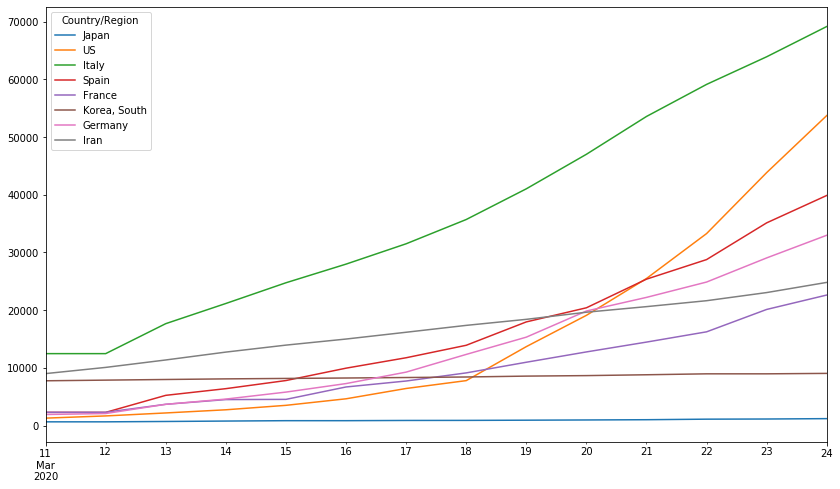

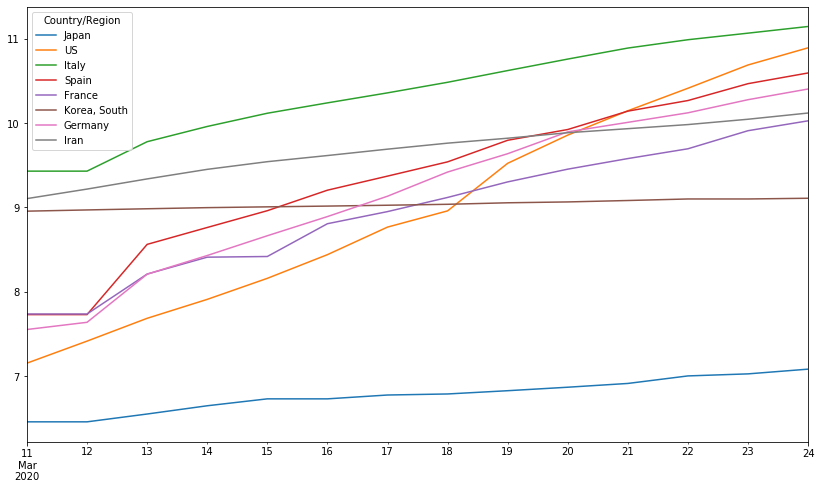

In [246]:
confirmed[ countries ].tail(14).plot(figsize=(14,8))
confirmed[ countries ].apply(np.log).tail(14).plot(figsize=(14,8))

# Measuring Rate of Change per country


In [251]:
# last 15 when there are more than 100 cases

confirmed_t = confirmed.transpose()
confirmed_t['latest'] = confirmed_t.iloc[:,-1:]
confirmed_t = confirmed_t[confirmed_t['latest'] > 50]
display(confirmed_t.iloc[:,-15:].loc[['Germany','Korea, South','China','Spain','Italy','US','France']])
display(confirmed_t.shape)

confirmed_chg = confirmed_t.transpose().pct_change().transpose()
confirmed_chg = confirmed_chg.drop(columns=['latest'])
confirmed_chg['latest'] = confirmed_chg.iloc[:,-1:]
confirmed_chg = confirmed_chg.replace([np.inf, -np.inf], np.nan).fillna(0).sort_values(['latest'], ascending=[0])

display(confirmed_chg.loc[['Germany','Korea, South','China','Spain','Italy','US','France']])
display(confirmed_chg.head())


,2020-03-11 00:00:00,2020-03-12 00:00:00,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,latest
Country/Region,,,,,,,,,,,,,,,
Germany,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,32986
"Korea, South",7755,7869,7979,8086,8162,8236,8320,8413,8565,8652,8799,8961,8961,9037,9037
China,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81591
Spain,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,39885
Italy,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,69176
US,1281,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740,53740
France,2293,2293,3681,4496,4532,6683,7715,9124,10970,12758,14463,16243,20123,22622,22622


(103, 64)

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,latest
Country/Region,,,,,,,,,,,,,,,,,,,,,
Germany,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.250000,...,0.254875,0.272965,0.331641,0.242800,0.295561,0.119156,0.119750,0.168174,0.135256,0.135256
"Korea, South",0.0,0.000000,1.000000,0.000000,0.500000,0.333333,0.000000,0.000000,0.00000,1.750000,...,0.009066,0.010199,0.011178,0.018067,0.010158,0.016990,0.018411,0.000000,0.008481,0.008481
China,0.0,0.173358,0.430793,0.528261,0.475818,0.386506,0.914842,0.104919,0.33744,0.204029,...,0.000370,0.000309,0.000543,0.000666,0.001158,0.000677,0.001599,0.000774,0.001141,0.001141
Spain,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.274942,0.181654,0.184031,0.291373,0.136224,0.243214,0.133759,0.221357,0.135161,0.135161
Italy,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.130642,0.126019,0.133530,0.149021,0.145875,0.139448,0.103774,0.080980,0.082109,0.082109
US,0.0,0.000000,1.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.00000,0.400000,...,0.323807,0.386226,0.212116,0.757292,0.396505,0.334503,0.305504,0.317676,0.225625,0.225625
France,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.333333,0.250000,0.00000,0.000000,...,0.474625,0.154422,0.182631,0.202324,0.162990,0.133642,0.123073,0.238872,0.124186,0.124186


,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,latest
Country/Region,,,,,,,,,,,,,,,,,,,,,
Cote d'Ivoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.000000,0.200000,0.500000,0.000000,0.555556,0.000000,0.785714,1.920000,1.920000
Ghana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.166667,0.000000,0.571429,0.454545,0.187500,0.210526,0.173913,0.962963,0.962963
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.312500,0.047619,0.000000,0.000000,0.090909,0.000000,0.666667,0.000000,0.850000,0.850000
New Zealand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.500000,0.666667,0.400000,0.392857,0.333333,0.961538,0.000000,0.519608,0.519608
Romania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.206107,0.164557,0.413043,0.065385,0.111913,0.191558,0.179837,0.330254,0.378472,0.378472


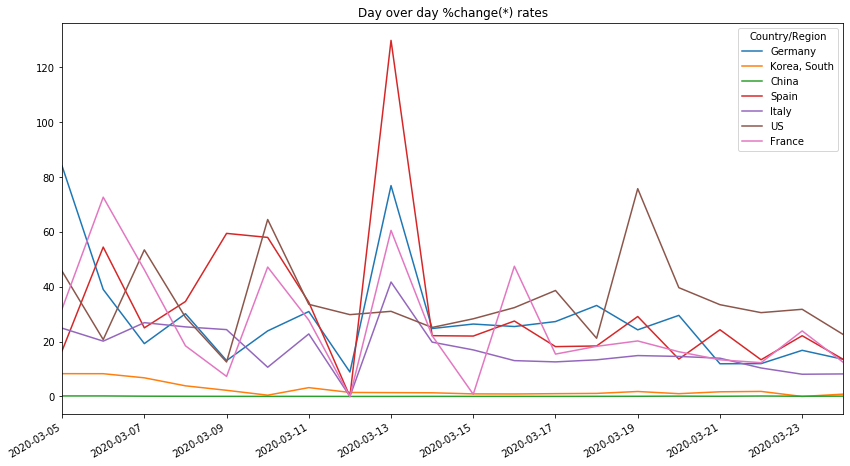

In [247]:
confirmed_chg.loc[['Germany','Korea, South','China','Spain','Italy','US','France']].mul(100).drop(columns=['latest']).transpose().tail(20).plot(figsize=(14,8),title='Day over day %change(*) rates')
